In [106]:
import pandas as pd
import sys, os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


## Task 3 Finished : Now below, I use my finished method chain that I turned into a function ##
- I drafted my method chain in my data wrangle notebook, then transferred to by project_functions notebook, then imported it here for use. 
- Currently I only have one method chain, but if I find the need to create more they will go in my project_fucntions notebook

In [108]:
sys.path.insert(0, os.path.abspath('..'))
from scripts.project_functions import load_process
df = load_process('/Users/jo-elle/Desktop/Data301/project/course-project-solo_305/data/raw.data/UCI_Credit_Card.csv')
df

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_1  PAY_2  PAY_3  \
0          1    20000.0    2          2         1   24      2      2     -1   
1          2   120000.0    2          2         2   26     -1      2      0   
2          3    90000.0    2          2         2   34      0      0      0   
3          4    50000.0    2          2         1   37      0      0      0   
4          5    50000.0    1          2         1   57     -1      0     -1   
...      ...        ...  ...        ...       ...  ...    ...    ...    ...   
29995  29996   220000.0    1          3         1   39      0      0      0   
29996  29997   150000.0    1          3         2   43     -1     -1     -1   
29997  29998    30000.0    1          2         2   37      4      3      2   
29998  29999    80000.0    1          3         1   41      1     -1      0   
29999  30000    50000.0    1          2         1   46      0      0      0   

       PAY_4  PAY_5  PAY_6  Default  
0         -1     -2     -2        1  
1          0      0      2        1  
2          0      0      0        0  
3          0      0      0        0  
4          0      0      0        0  
...      ...    ...    ...      ...  
29995      0      0      0        0  
29996     -1      0      0        0  
29997     -1      0      0        1  
29998      0      0     -1        1  
29999      0      0      0        1  

[30000 rows x 13 columns]

## Exploratory Data analysis Task 4 ##

In [109]:
#I am going to attempt to find the mean age, mean bill payment, mean bill amount, and the range of different education level
#I am also going to look for correlations, and use groupby to find more specific analysis
df.mean()

ID            15000.500000
LIMIT_BAL    167484.322667
SEX               1.603733
EDUCATION         1.853133
MARRIAGE          1.551867
AGE              35.485500
PAY_1            -0.016700
PAY_2            -0.133767
PAY_3            -0.166200
PAY_4            -0.220667
PAY_5            -0.266200
PAY_6            -0.291100
Default           0.221200
dtype: float64

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         30000 non-null  int64  
 1   LIMIT_BAL  30000 non-null  float64
 2   SEX        30000 non-null  int64  
 3   EDUCATION  30000 non-null  int64  
 4   MARRIAGE   30000 non-null  int64  
 5   AGE        30000 non-null  int64  
 6   PAY_1      30000 non-null  int64  
 7   PAY_2      30000 non-null  int64  
 8   PAY_3      30000 non-null  int64  
 9   PAY_4      30000 non-null  int64  
 10  PAY_5      30000 non-null  int64  
 11  PAY_6      30000 non-null  int64  
 12  Default    30000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 3.0 MB


In [111]:
# I am going to now describe all my variables and split them up according to whether they contain catergorical variables or actualy values
#Categorical variables description, this is showing me the percent of number in these three categories that use number to classify a characterisitc
df[['SEX', 'EDUCATION', 'MARRIAGE']].describe()

SEX     EDUCATION      MARRIAGE
count  30000.000000  30000.000000  30000.000000
mean       1.603733      1.853133      1.551867
std        0.489129      0.790349      0.521970
min        1.000000      0.000000      0.000000
25%        1.000000      1.000000      1.000000
50%        2.000000      2.000000      2.000000
75%        2.000000      2.000000      2.000000
max        2.000000      6.000000      3.000000

In [112]:
# Payment delay description
df[['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].describe()

PAY_1         PAY_2         PAY_3         PAY_4         PAY_5  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean      -0.016700     -0.133767     -0.166200     -0.220667     -0.266200   
std        1.123802      1.197186      1.196868      1.169139      1.133187   
min       -2.000000     -2.000000     -2.000000     -2.000000     -2.000000   
25%       -1.000000     -1.000000     -1.000000     -1.000000     -1.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        8.000000      8.000000      8.000000      8.000000      8.000000   

              PAY_6  
count  30000.000000  
mean      -0.291100  
std        1.149988  
min       -2.000000  
25%       -1.000000  
50%        0.000000  
75%        0.000000  
max        8.000000

In [113]:
df.LIMIT_BAL.describe()

count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

In [114]:
import pandas_profiling
from pandas_profiling import ProfileReport
profile = ProfileReport(df, title="Pandas Profiling Report")
profile

In [115]:
# Now that I know my data better I am going to clean it
# The 3 in marriage can be categorized as other, other can mean divroced, widowed etc...
df.loc[df.MARRIAGE == 3, 'MARRIAGE'] = "other"
df.loc[df.MARRIAGE == 0, 'MARRIAGE'] = "other"
df.MARRIAGE.value_counts()

2        15964
1        13659
other      377
Name: MARRIAGE, dtype: int64

In [116]:
df.loc[df.EDUCATION == 5, 'EDUCATION'] = 4
df.loc[df.EDUCATION == 6, 'EDUCATION'] = 4
df.loc[df.EDUCATION == 0, 'EDUCATION'] = 4

df.EDUCATION.value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

In [117]:
#Now I'm going to start my initial analysis, first I'm looking at any correlation between sex and payment
df.groupby(['SEX', 'Default']).size()

SEX  Default
1    0           9015
     1           2873
2    0          14349
     1           3763
dtype: int64

In [118]:
dfgender = df.groupby(['SEX', 'Default']).size().unstack(1)
dfgender

Default      0     1
SEX                 
1         9015  2873
2        14349  3763

<AxesSubplot:xlabel='SEX'>

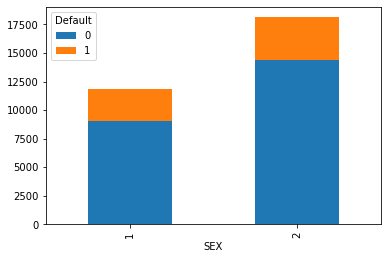

In [119]:
dfgender.plot(kind='bar', stacked = True)

## So looking at my first visualization, I can see the number of male to female who did or did not default on their credit cards( as defined in my READ.MD 1= yes default, 0= no default, 1= male, 2= female)
- Initial obsverations:
    1. There is a greater number of females with credit cards in this dataset, it seems like women might have a default rate but this may be due to more of them being in the data.
    2. Default doesn't seem to vary a lot based on this visualization
## Now, I'm going to find the percentage of default based on gender 

In [120]:
dfgender['perc'] = (dfgender[1]/(dfgender[0] + dfgender[1]))
dfgender

Default      0     1      perc
SEX                           
1         9015  2873  0.241672
2        14349  3763  0.207763

### I created a function to repeat my correlation process with my other variables, it is in my project_functions and now I will try to import it

In [156]:
sys.path.insert(0, os.path.abspath('..'))
from scripts.project_functions import correlation
#This should work to import but it's not.... 

ImportError: cannot import name 'correlation' from 'scripts.project_functions' (/Users/jo-elle/Desktop/Data301/project/course-project-solo_305/analysis/scripts/project_functions.py)

In [157]:
#Unless I can get my import to work, for now I will have to define my correlation function in here 
def correlation(Col1, Col2):
    res = df.groupby([Col1, Col2]).size().unstack()
    res['percentage'] = (res[res.columns[1]]/(res[res.columns[0]] + res[res.columns[1]]))
    return res

In [149]:
correlation("EDUCATION", "Default")

Default        0     1  percentage
EDUCATION                         
1           8549  2036    0.192348
2          10700  3330    0.237349
3           3680  1237    0.251576
4            435    33    0.070513

In [150]:
dfeducation = df.groupby(['EDUCATION', 'Default']).size().unstack(1)
dfeducation

Default        0     1
EDUCATION             
1           8549  2036
2          10700  3330
3           3680  1237
4            435    33

<AxesSubplot:xlabel='EDUCATION'>

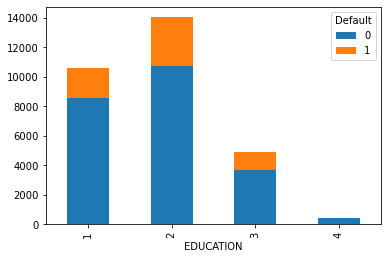

In [129]:
dfeducation.plot(kind='bar', stacked = True)

## Observations: 1=graduate school, 2=university, 3=high school, 4=others
1. Seems like there is higher default rate for university graduates, this may be due to more people being in this category, or the fact that they need credit cards to help pay off their sutdies?
2. Our category for others isn't very help full
3. It seems that there is a lot less high school graduates who have a credit card at all compared to graduate and university. I wonder if this is due to them not getting approved for a credit card or other factors.
4. I'm not really sure if i like this plot format, I'm finding it a bit inclear. So I might want to switch format for my research analysis.

In [125]:
correlation("MARRIAGE", "Default")

Default       0     1      perc
MARRIAGE                       
1         10453  3206  0.234717
2         12623  3341  0.209283
other       288    89  0.236074

<AxesSubplot:xlabel='MARRIAGE'>

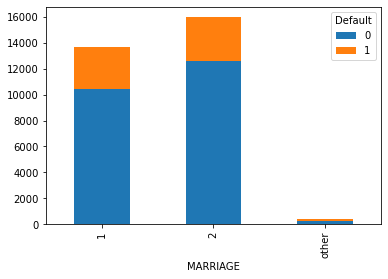

In [130]:
dfmarriage = df.groupby(['MARRIAGE', 'Default']).size().unstack(1)
dfmarriage 
dfmarriage.plot(kind='bar', stacked = True)

## Observations: 1=married, 2=single, others
1. Again it seems like rate of default isn't crazy different between those who are married or not. 
2. Not the best format for looking at the other columns, the scale isn't very good
3. Seems overall there is more single people than married in total

 So I noticed that there are values in my pay periods that are not defined in my READ.MD, so in this cell I am going to try and fix that.

In [134]:

a = (df.PAY_1 == -2) | (df.PAY_1 == -1) | (df.PAY_1 == 0)
df.loc[a, 'PAY_1'] = 0
a = (df.PAY_2 == -2) | (df.PAY_2 == -1) | (df.PAY_2 == 0)
df.loc[a, 'PAY_2'] = 0
a = (df.PAY_3 == -2) | (df.PAY_3 == -1) | (df.PAY_3 == 0)
df.loc[a, 'PAY_3'] = 0
a = (df.PAY_4 == -2) | (df.PAY_4 == -1) | (df.PAY_4 == 0)
df.loc[a, 'PAY_4'] = 0
a = (df.PAY_5 == -2) | (df.PAY_5 == -1) | (df.PAY_5 == 0)
df.loc[a, 'PAY_5'] = 0
a = (df.PAY_6 == -2) | (df.PAY_6 == -1) | (df.PAY_6 == 0)
df.loc[a, 'PAY_6'] = 0
late = df[['PAY_1','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']]
df

ID  LIMIT_BAL  SEX  EDUCATION MARRIAGE  AGE  PAY_1  PAY_2  PAY_3  \
0          1    20000.0    2          2        1   24      2      2      0   
1          2   120000.0    2          2        2   26      0      2      0   
2          3    90000.0    2          2        2   34      0      0      0   
3          4    50000.0    2          2        1   37      0      0      0   
4          5    50000.0    1          2        1   57      0      0      0   
...      ...        ...  ...        ...      ...  ...    ...    ...    ...   
29995  29996   220000.0    1          3        1   39      0      0      0   
29996  29997   150000.0    1          3        2   43      0      0      0   
29997  29998    30000.0    1          2        2   37      4      3      2   
29998  29999    80000.0    1          3        1   41      1      0      0   
29999  30000    50000.0    1          2        1   46      0      0      0   

       PAY_4  PAY_5  PAY_6  Default  
0          0      0      0        1  
1          0      0      2        1  
2          0      0      0        0  
3          0      0      0        0  
4          0      0      0        0  
...      ...    ...    ...      ...  
29995      0      0      0        0  
29996      0      0      0        0  
29997      0      0      0        1  
29998      0      0      0        1  
29999      0      0      0        1  

[30000 rows x 13 columns]

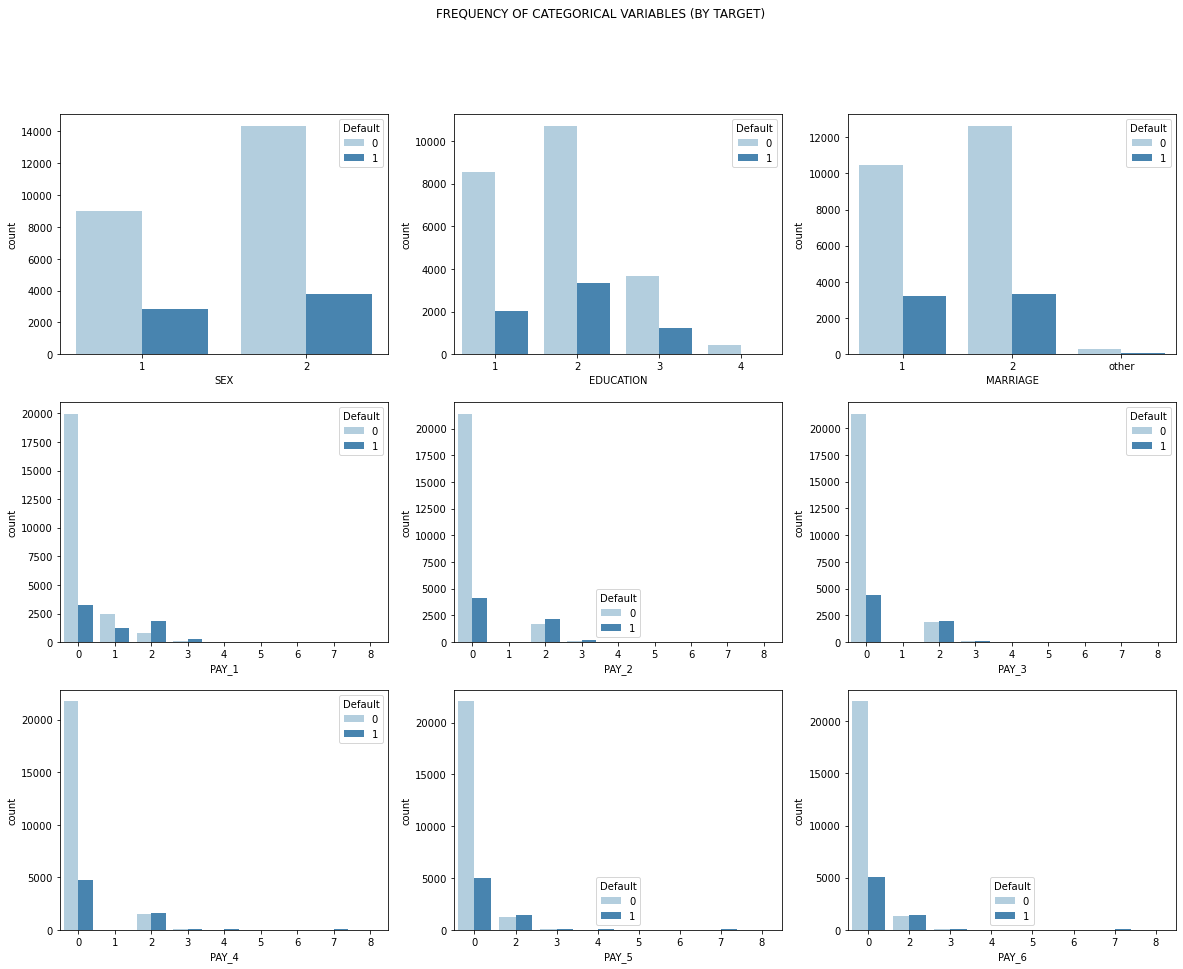

In [135]:
subset = df[['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 
               'PAY_5', 'PAY_6', 'Default']]

f, axes = plt.subplots(3, 3, figsize=(20, 15), facecolor='white')
f.suptitle('FREQUENCY OF CATEGORICAL VARIABLES (BY TARGET)')
ax1 = sns.countplot(x="SEX", hue="Default", data=subset, palette="Blues", ax=axes[0,0])
ax2 = sns.countplot(x="EDUCATION", hue="Default", data=subset, palette="Blues",ax=axes[0,1])
ax3 = sns.countplot(x="MARRIAGE", hue="Default", data=subset, palette="Blues",ax=axes[0,2])
ax4 = sns.countplot(x="PAY_1", hue="Default", data=subset, palette="Blues", ax=axes[1,0])
ax5 = sns.countplot(x="PAY_2", hue="Default", data=subset, palette="Blues", ax=axes[1,1])
ax6 = sns.countplot(x="PAY_3", hue="Default", data=subset, palette="Blues", ax=axes[1,2])
ax7 = sns.countplot(x="PAY_4", hue="Default", data=subset, palette="Blues", ax=axes[2,0])
ax8 = sns.countplot(x="PAY_5", hue="Default", data=subset, palette="Blues", ax=axes[2,1])
ax9 = sns.countplot(x="PAY_6", hue="Default", data=subset, palette="Blues", ax=axes[2,2]);

## Observations:
1. With this format I feel like I can more clearly see the rate of default between variables and can better make observations.
2. I'm seeing slightly more females defaulting than males
3. It looks like university graduates have the highest rate of default 
4. For marriage it looks almost dead even between married and single
5. Now, looking at my payment periods:(0=pay duly, 1=payment delay for one month, 2=payment delay for two months, ...  8=payment delay for eight months, 9=payment delay for nine months and above)
    -  It looks for the most part people paid on time
    - When they didn't it looks like they were late for two pay periods.
   


## Task 5:  Conduct your analysis to help answer your research question(s)

### My research questions are:  

1.What is the range of balance limit of the credit cards in this dataset and is there any correlation between the limit balance and default rate?

2.Are there any conclusions that can be drawn about different types of people defaulting on their credit cards?

3.Can certain types of peoples be classified as a credible lender by their age, marital status or education level?

In [136]:
df

ID  LIMIT_BAL  SEX  EDUCATION MARRIAGE  AGE  PAY_1  PAY_2  PAY_3  \
0          1    20000.0    2          2        1   24      2      2      0   
1          2   120000.0    2          2        2   26      0      2      0   
2          3    90000.0    2          2        2   34      0      0      0   
3          4    50000.0    2          2        1   37      0      0      0   
4          5    50000.0    1          2        1   57      0      0      0   
...      ...        ...  ...        ...      ...  ...    ...    ...    ...   
29995  29996   220000.0    1          3        1   39      0      0      0   
29996  29997   150000.0    1          3        2   43      0      0      0   
29997  29998    30000.0    1          2        2   37      4      3      2   
29998  29999    80000.0    1          3        1   41      1      0      0   
29999  30000    50000.0    1          2        1   46      0      0      0   

       PAY_4  PAY_5  PAY_6  Default  
0          0      0      0        1  
1          0      0      2        1  
2          0      0      0        0  
3          0      0      0        0  
4          0      0      0        0  
...      ...    ...    ...      ...  
29995      0      0      0        0  
29996      0      0      0        0  
29997      0      0      0        1  
29998      0      0      0        1  
29999      0      0      0        1  

[30000 rows x 13 columns]

### Starting with question 1:What is the range of balance limit of the credit cards in this dataset and is there any correlation between the limit balance and default rate?

To start, I am going to pull down some of my EDA that will help answer this question.

In [167]:
df.LIMIT_BAL.describe()

count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

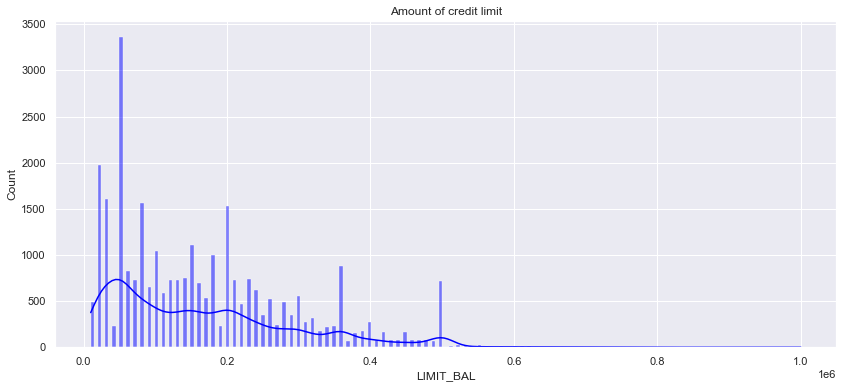

In [198]:
plt.figure(figsize = (14,6))
plt.title('Amount of credit limit')
sns.set_color_codes("pastel")
sns.histplot(df['LIMIT_BAL'],kde=True,bins=200, color="blue")
plt.show()


In [196]:
df['LIMIT_BAL'].value_counts().shape

(81,)

In [197]:
df['LIMIT_BAL'].value_counts().head()

50000.0     3365
20000.0     1976
30000.0     1610
80000.0     1567
200000.0    1528
Name: LIMIT_BAL, dtype: int64

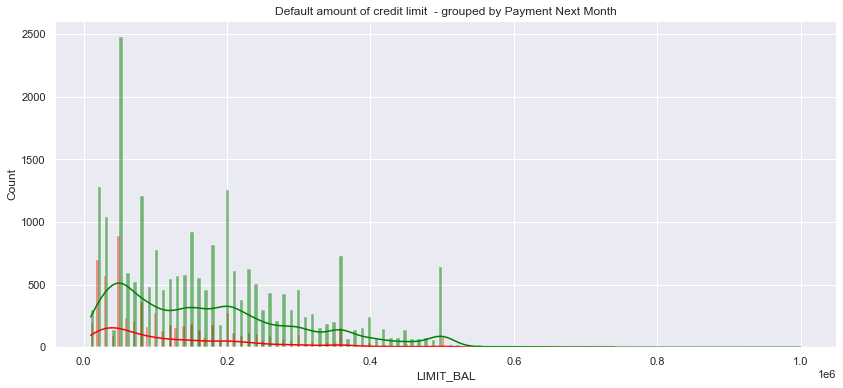

In [200]:
class_0 = df.loc[df['Default'] == 0]["LIMIT_BAL"]
class_1 = df.loc[df['Default'] == 1]["LIMIT_BAL"]
plt.figure(figsize = (14,6))
plt.title('Default amount of credit limit  - grouped by Payment Next Month')
sns.set_color_codes("pastel")
sns.histplot(class_1,kde=True,bins=200, color="red")
sns.histplot(class_0,kde=True,bins=200, color="green")
plt.show()

##  What is the range of balance limit of the credit cards in this dataset
### Summary of findings: 
- Based on above, their are 81 different limit balances given in the dataset. The limit of 50,000 has the highest number of clients with 3365 individuals with that limit. Most of defaults are for credit limits 0-100,000 (and density for this interval is larger for defaults than for non-defaults). Larger defaults number are for the amounts of 50,000, 20,000 and 30,000.
### Insight: 
- I'm intrigued by how the rate of defaul is highest at the credit limits of 50,000, 20,000 and 30,000. My initial thoughts were that higher default would be correlated to lower limit balances as riskier clients would normally have lower limits. It could be my initial thoughts are wrong.
### Conclusion:
- After my above analysis and visualizations, the range of balance limit is from 1000 to 1000000. In regards to correlations between default and limit balances, the limit balances between 20,000 to 50,000 seem to have higher default rates.

### As I'm a bit curious, I'm going to look at limit balances in relation to my other variables

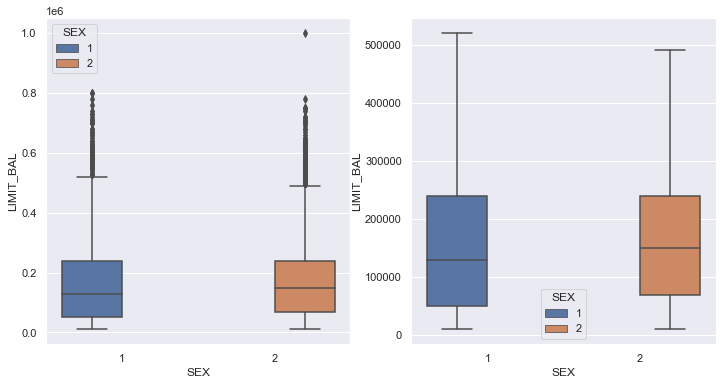

In [227]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
s = sns.boxplot(ax = ax1, x="SEX", y="LIMIT_BAL", hue="SEX",data=df,showfliers=True)
s = sns.boxplot(ax = ax2, x="SEX", y="LIMIT_BAL", hue="SEX",data=df,showfliers=False)
plt.show();

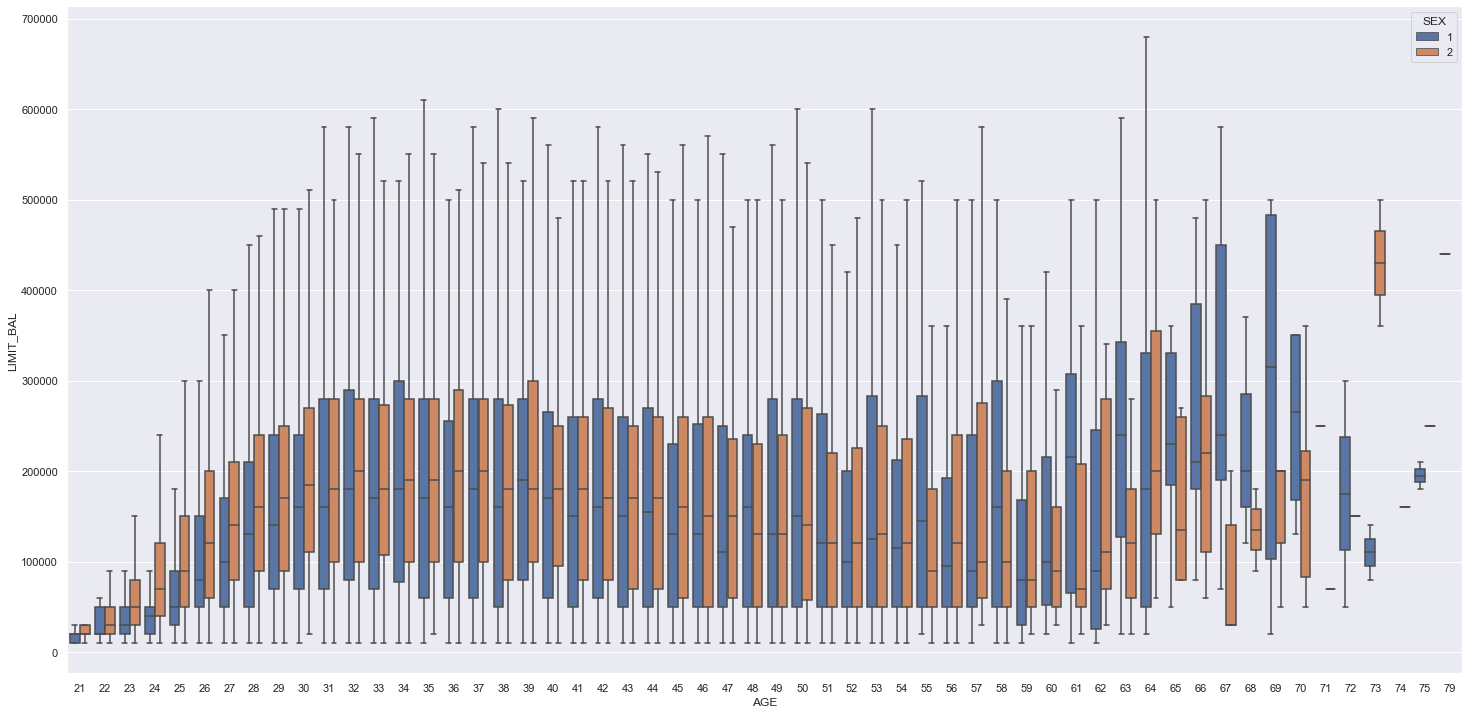

In [221]:
fig, ax1 = plt.subplots(ncols=1)
s = sns.boxplot(ax = ax1, x="AGE", y="LIMIT_BAL", hue='SEX',
                data=df,showfliers=False)
s.set_xticklabels(s.get_xticklabels())
plt.show();

I'm going to use the function above to help show my other variables in relation to limit balance

In [222]:
def boxplot1(feature1, feature2, feature3, width=16):
    fig, ax1 = plt.subplots(ncols=1, figsize=(width,6))
    s = sns.boxplot(ax = ax1, x=feature1, y=feature2, hue=feature3,
                data=df,showfliers=False)
    s.set_xticklabels(s.get_xticklabels())
    plt.show();
#Turned my above graph into a function incase I need to use it again later.

In [223]:
sys.path.insert(0, os.path.abspath('..'))
from scripts.project_functions import boxplot1
#Again still can't get my import to work...

ImportError: cannot import name 'boxplot1' from 'scripts.project_functions' (/Users/jo-elle/Desktop/Data301/project/course-project-solo_305/analysis/scripts/project_functions.py)

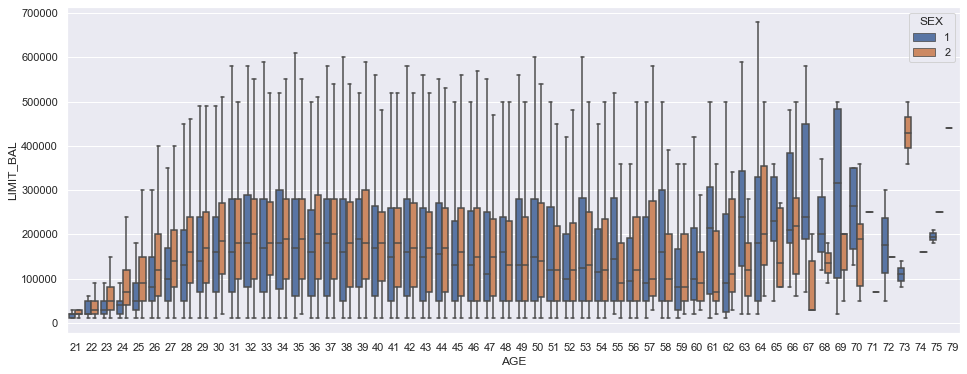

In [224]:
boxplot1('AGE','LIMIT_BAL', 'SEX',16)
#just testing the function

### Insight from above graph:
- Looking at the age distribution the limit balance increases from age 21 to around 30 where it then seems to balance out until the later 40s and then it varies up and down and doesn't exactly follow a trend.
- Interestingly enough, mean for females are larger up until age 39, and 48 where males take a higher mean until age 60.

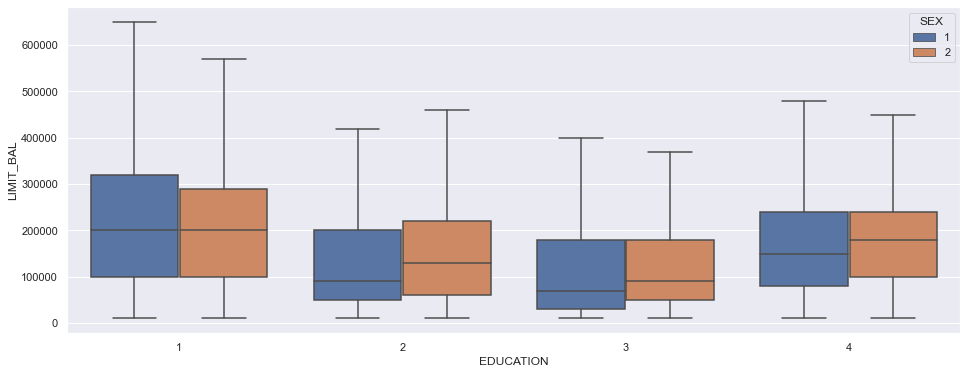

In [225]:
boxplot1('EDUCATION', 'LIMIT_BAL', 'SEX',16)

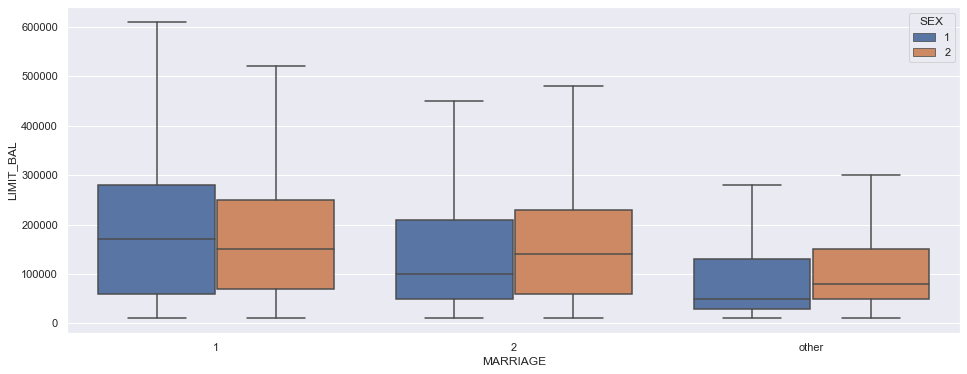

In [226]:
boxplot1("MARRIAGE", "LIMIT_BAL", "SEX",16)

# Research question 2:
### Are there any conclusions that can be drawn about different types of people defaulting on their credit cards?

In [151]:
correlation("EDUCATION", "Default")

Default        0     1  percentage
EDUCATION                         
1           8549  2036    0.192348
2          10700  3330    0.237349
3           3680  1237    0.251576
4            435    33    0.070513

In [152]:
correlation("MARRIAGE", "Default")

Default       0     1  percentage
MARRIAGE                         
1         10453  3206    0.234717
2         12623  3341    0.209283
other       288    89    0.236074

In [153]:
correlation("AGE", "Default")

Default       0      1  percentage
AGE                               
21         53.0   14.0    0.208955
22        391.0  169.0    0.301786
23        684.0  247.0    0.265306
24        827.0  300.0    0.266193
25        884.0  302.0    0.254637
26       1003.0  253.0    0.201433
27       1164.0  313.0    0.211916
28       1123.0  286.0    0.202981
29       1292.0  313.0    0.195016
30       1121.0  274.0    0.196416
31        988.0  229.0    0.188168
32        933.0  225.0    0.194301
33        931.0  215.0    0.187609
34        931.0  231.0    0.198795
35        887.0  226.0    0.203055
36        854.0  254.0    0.229242
37        812.0  229.0    0.219981
38        750.0  194.0    0.205508
39        755.0  199.0    0.208595
40        683.0  187.0    0.214943
41        639.0  185.0    0.224515
42        609.0  185.0    0.232997
43        520.0  150.0    0.223881
44        538.0  162.0    0.231429
45        501.0  116.0    0.188006
46        413.0  157.0    0.275439
47        381.0  120.0    0.239521
48        362.0  104.0    0.223176
49        333.0  119.0    0.263274
50        310.0  101.0    0.245742
51        252.0   88.0    0.258824
52        226.0   78.0    0.256579
53        251.0   74.0    0.227692
54        191.0   56.0    0.226721
55        152.0   57.0    0.272727
56        129.0   49.0    0.275281
57         95.0   27.0    0.221311
58         91.0   31.0    0.254098
59         62.0   21.0    0.253012
60         44.0   23.0    0.343284
61         35.0   21.0    0.375000
62         37.0    7.0    0.159091
63         23.0    8.0    0.258065
64         22.0    9.0    0.290323
65         19.0    5.0    0.208333
66         18.0    7.0    0.280000
67         11.0    5.0    0.312500
68          4.0    1.0    0.200000
69         12.0    3.0    0.200000
70          8.0    2.0    0.200000
71          3.0    NaN         NaN
72          2.0    1.0    0.333333
73          1.0    3.0    0.750000
74          1.0    NaN         NaN
75          2.0    1.0    0.333333
79          1.0    NaN         NaN

### So I have a few NaN values above, but that's okay as that simply means for that age no one defaulted on their credit card, in this case for now I will leave in these values unless it is problemsome for my visualizations

In [154]:
correlation("SEX", "Default")

Default      0     1  percentage
SEX                             
1         9015  2873    0.241672
2        14349  3763    0.207763

<AxesSubplot:xlabel='SEX', ylabel='Default'>

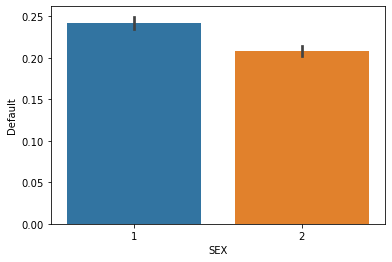

In [158]:
sns.barplot(x=df['SEX'], y=df['Default'], data=df)

<AxesSubplot:xlabel='EDUCATION', ylabel='Default'>

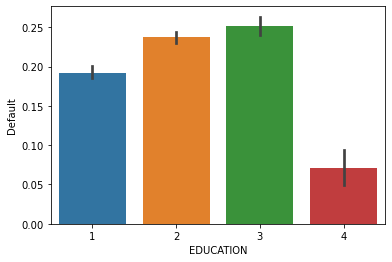

In [159]:
sns.barplot(x=df['EDUCATION'], y=df['Default'], data=df)

<AxesSubplot:xlabel='MARRIAGE', ylabel='Default'>

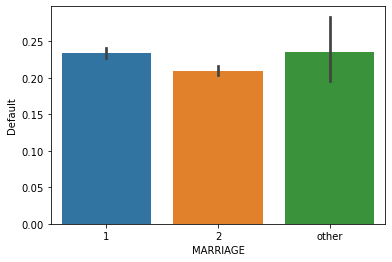

In [160]:
sns.barplot(x=df['MARRIAGE'], y=df['Default'], data=df)

<AxesSubplot:xlabel='AGE', ylabel='Default'>

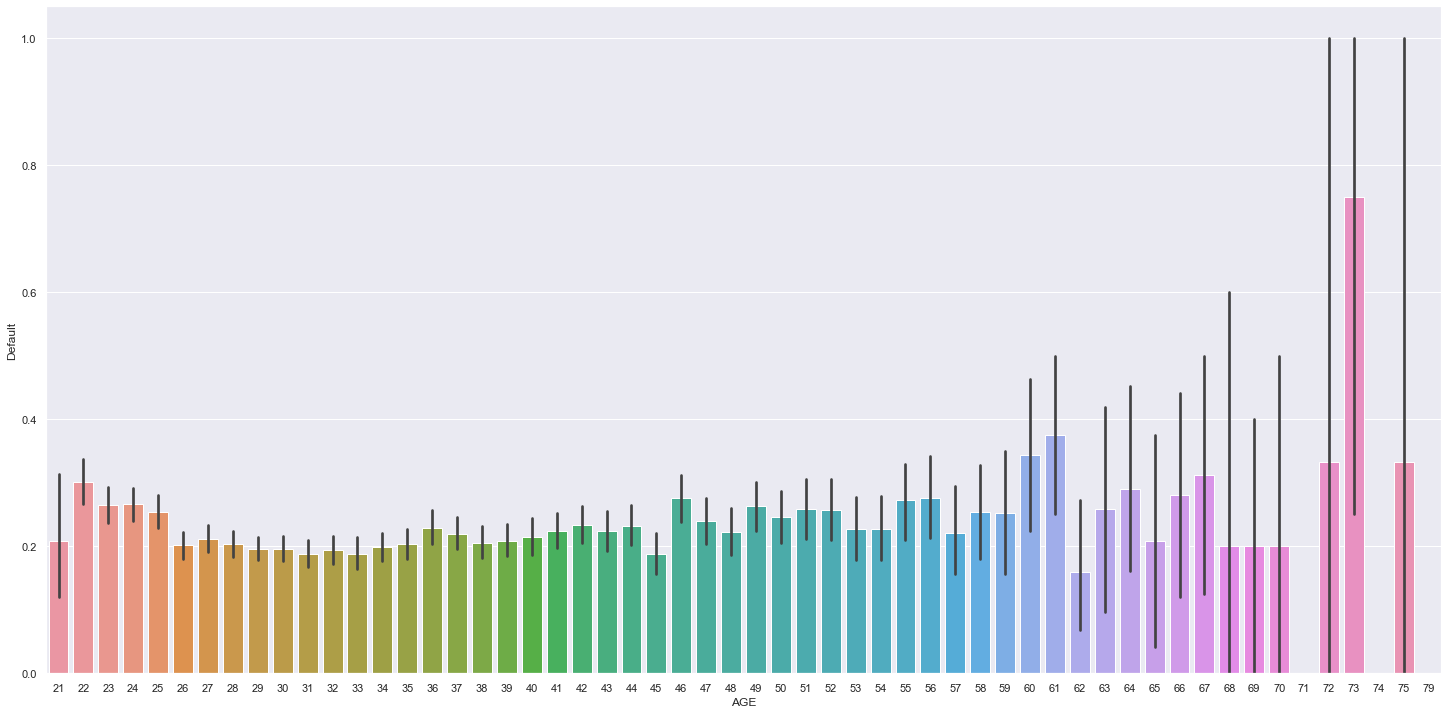

In [166]:
sns.set(rc={'figure.figsize':(25,12.27)})
sns.barplot(x=df['AGE'], y=df['Default'], data=df)

## Initial thoughts for research question 2:
### Summary of findings:
- Sex: Interestingly enough, in my EDA I said that it seemed as though women had a higher default rate and said that is may be due to their being more females in the data. But now that I have plotted gender and default alone, it seems that men have a higher default, which is interesting as there are less of them over all. 
- Age: The barplot is a bit busy in this format, I may draft a new one with age ranges over 5 years such as 20-25, etc.. in order to not have so many X variables. But looking at the barplot above, there is still some interesting insight. For the most part default rate is fairly steady from 20% to 40% but there are a few instances at 73 where default is a lot higher, this may be due to one or a few data points thought so no real conclusion can be drawn yet of whether this is a true value or simply an outlier. 
- Marriage: Looking at the three variables, single and married are fairly close between 20% and 25% rates of default. The other category is insteresting, in my EDA the visualization I used wasn't very insightful on default for those in this category but now I can see that even though overall there's less data points the rate of default is high. 
- Education: This visualization is interesting as well. The highest rate of dfault is category 3 which is high school education, yet the number of data points for high school is a lot less than 1 or 2 which correspond to post secondary schooling. This also differs from my EDA analysis. 
### Insight:
- One thing I've noticed by using this sort of visualization is that I can't see the number of data points that correspond to each X variable, so although it may seem that one variable has a higher default rate, this may be due to a number of factors such as more/ less data avaible for such range. 
- But still this does give me some insight into what better visualizations should include and helps guide me to a better way to find a more concrete answer to my research question.

### Conslusion:
- At this point my initial conclusions are: (***These may change as I change my visualization/ create new ones***)
- Sex: Men may have a higher rate of default.
- Age: Default based on age seems to be fairly consistent. 
- Marriage: The other category seems to have a higher rate of default, this may be due to the surrounding circumstances that gets someone classified as "other".
- Education: It seems that higher education might correlate with less defaulting.

## Research question 3:
### Can certain types of peoples be classified as a credible lender by their age, marital status or education level?

In [ ]:
def credible()
